In [31]:
import pandas as pd
import json
import numpy as np

from itertools import product
from tqdm.notebook import tqdm

In [38]:
with open('telco_directed.json') as f:
    data= json.load(f)

In [39]:
#edge_list
location_list = list(product(data['locations'], data['locations']))

values = np.array(data['data'])

df = pd.DataFrame()
df['src'] = [i[0] for i in location_list]
df['dst'] = [i[1] for i in location_list]

for idx, date in enumerate(data['dates']):
    df[date] = values[:,idx]

In [40]:
df = df.melt(id_vars=['src','dst'],var_name='day')

In [41]:
df['inversed'] = 1 / df.value
df.inversed = df.inversed / np.max(df.inversed[df.inversed != np.inf])

In [42]:
import networkx as nx

In [43]:
df

,src,dst,day,value,inversed
0,Aabenraa,Aabenraa,2020-02-01 00:00:00,323162.099102,0.000015
1,Aabenraa,Aalborg,2020-02-01 00:00:00,405.268442,0.012338
2,Aabenraa,Albertslund,2020-02-01 00:00:00,0.000000,inf
3,Aabenraa,Allerød,2020-02-01 00:00:00,0.000000,inf
4,Aabenraa,Assens,2020-02-01 00:00:00,690.133217,0.007245
...,...,...,...,...,...
4955659,Ærø,Vesthimmerland,2021-06-30 00:00:00,0.000000,inf
4955660,Ærø,Viborg,2021-06-30 00:00:00,0.000000,inf
4955661,Ærø,Vordingborg,2021-06-30 00:00:00,0.000000,inf
4955662,Ærø,Århus,2021-06-30 00:00:00,0.000000,inf


In [44]:
days, dist = [], []
for day in df.day.unique():
    print(day)
    
    subset = df[df.day == day].copy()
    subset = subset[['src', 'dst', 'inversed']]
    #subset.drop('day', inplace=True, axis=1)
    
    #subset_non_zero = subset #subset[subset.value != 0].copy()
    #subset_non_zero.value = 1/subset_non_zero.value
    G = nx.DiGraph()
    G.add_weighted_edges_from(subset.values)
    dist.append(nx.average_shortest_path_length(G, weight="weight"))
    days.append(day)

2020-02-01 00:00:00
2020-02-02 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00
2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-08 00:00:00
2020-02-09 00:00:00
2020-02-10 00:00:00
2020-02-11 00:00:00
2020-02-12 00:00:00
2020-02-13 00:00:00
2020-02-14 00:00:00
2020-02-15 00:00:00
2020-02-16 00:00:00
2020-02-17 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00
2020-02-20 00:00:00
2020-02-21 00:00:00
2020-02-22 00:00:00
2020-02-23 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00
2020-02-26 00:00:00
2020-02-27 00:00:00
2020-02-28 00:00:00
2020-02-29 00:00:00
2020-03-01 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-07 00:00:00
2020-03-08 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00
2020-03-14 00:00:00
2020-03-15 00:00:00
2020-03-16 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-20 00:00:00
2020-03-21 00:00:00


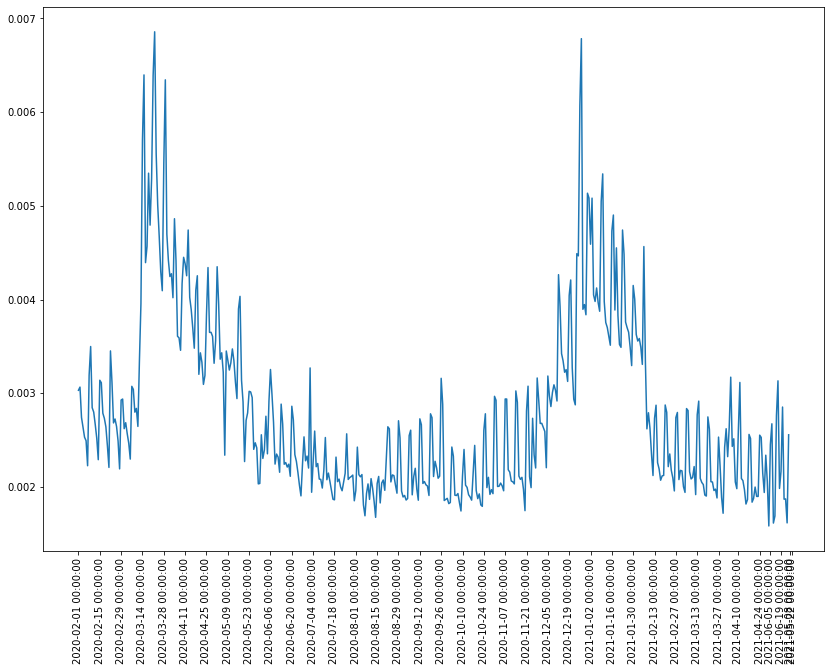

In [45]:
import matplotlib.pylab as plt
%matplotlib inline
dist = np.array(dist)
days = np.array(days)
#plt.hist(dist[dist < 1])
plt.figure(figsize=(14, 10))
plt.plot(days[dist < 1], dist[dist < 1])
plt.xticks(days[::14], rotation=90);

In [46]:
mun = pd.read_csv('../data/Municipality_cases_time_series.csv', sep=';')
mun.set_index('SampleDate', inplace=True)

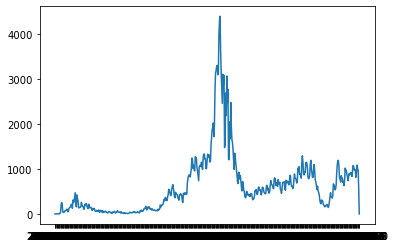

In [47]:
mun['total'] = mun.sum(axis=1)
plt.plot(mun.index, mun.total)
exclude_days = days[dist > 99]

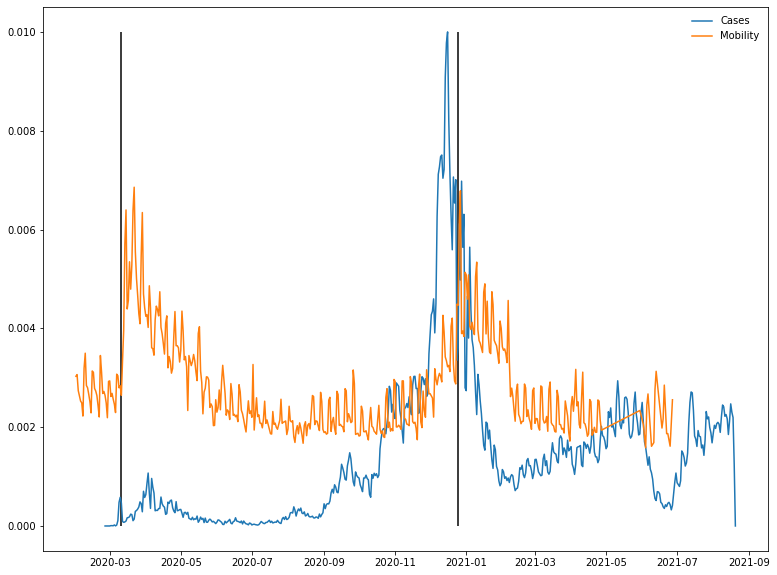

In [48]:
plt.figure(figsize=(13, 10))
plt.plot(pd.to_datetime(mun.index), mun.total / max(mun.total) / 1e2)
plt.plot(pd.to_datetime(days[dist < 99]), dist[dist < 99])
plt.legend(('Cases', 'Mobility'), loc='best', frameon=False)
doi = pd.to_datetime(['2020-03-11', '2020-12-25'])
plt.vlines(doi, 0, 0.01, color='k');

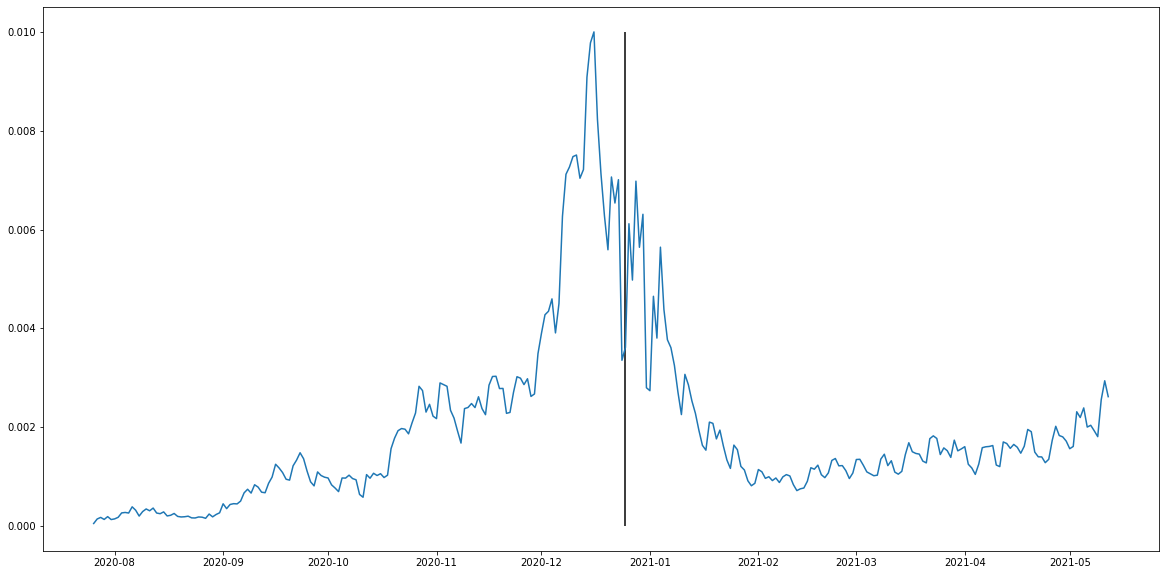

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(pd.to_datetime(mun.index)[150:-100], mun.total[150:-100] / max(mun.total) / 1e2)
doi = pd.to_datetime(['2020-03-11', '2020-12-25'])
plt.vlines(doi[1], 0, 0.01, color='k');

In [52]:
adm = pd.read_csv('../data/Newly_admitted_over_time.csv', sep=';')

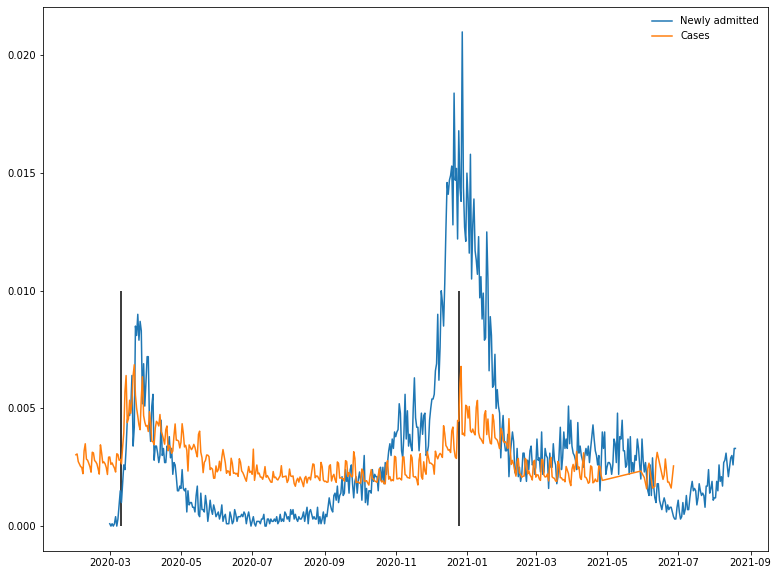

In [53]:
plt.figure(figsize=(13, 10))
plt.plot(pd.to_datetime(adm.Dato), adm.Total / 1e4)
plt.plot(pd.to_datetime(days[dist < 99]), dist[dist < 99])
plt.legend(('Newly admitted', 'Cases', 'Mobility'), loc='best', frameon=False)
plt.vlines(doi, 0, 0.01, color='k');

In [54]:
import datetime
doi_7d = doi + datetime.timedelta(days=7)

In [55]:
def get_average(time, series, lag, t0):
    time = pd.to_datetime(time)
    t1 = t0 + datetime.timedelta(days=lag)
    if lag > 0:
        idx = (time <= t1) & (time >= t0)
    else:
        idx = (time >= t1) & (time <= t0)
    return np.median(series[idx])

def get_perc(time, series, lags, t0):
    a = get_average(time, series, lags[0], t0)
    b = get_average(time, series, lags[1], t0)
    return (a-b)/a*100

print('Mobility(1):', get_perc(days, dist, (-7, 7), doi[0]))
print('Case(1):', get_perc(mun.index, mun.total, (7, 14), doi[0]))

print('Mobility(2):', get_perc(days, dist, (-7, 7), doi[1]))
print('Case(2):', get_perc(mun.index, mun.total, (7, 14), doi[1]))

Mobility(1): -64.59582610421081
Case(1): -27.73109243697479
Mobility(2): -30.51306074603219
Case(2): 17.45009658725048


In [260]:
import pandas as pd

Merge of the mobility data set with the distance/travel-time data of the municipalities

In [271]:
df_merged = pd.merge(df,zip1, left_on=["src","dst"], right_on=["orig","dest"])
df_merged.drop(columns=["orig", "dest"], inplace=True)

Grouping the data w.r.t length of the travel-time

In [338]:
df_merged["bin"] = pd.cut(df_merged["duration"],bins=(-1,900,3600,7200,50000),labels=("15 min", "1 hour", "2 hours", "long"))

Total number of short trips (< 15 min) in Denmark over time

<AxesSubplot:xlabel='day'>

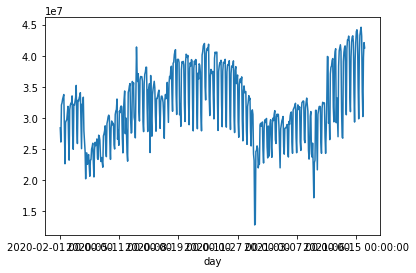

In [331]:
df_15min = df_merged[df_merged["bin"] == "15 min"]
df_15min_sum = df_15min.groupby("day").sum()
df_15min_sum["value"].plot()

Change in the total number of short trips (< 15 min) in Denmark in relation to a baselevel

Take the daily average over the first week of measurements.

In [332]:
seven_days = df_15min_sum[1:7]
baseline = seven_days["value"].mean()
df_15min_rel = (df_15min_sum["value"]-baseline)/baseline

<AxesSubplot:xlabel='day'>

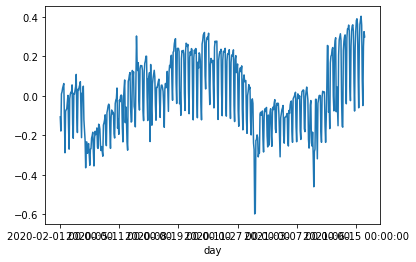

In [333]:
df_15min_rel.plot()

<AxesSubplot:xlabel='day'>

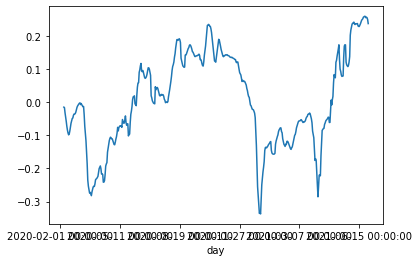

In [343]:
df_15min_rel.rolling(window=7).mean().plot()

<AxesSubplot:xlabel='day'>

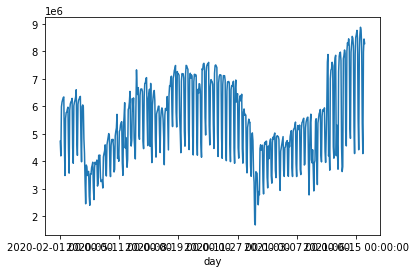

In [335]:
df_1h = df_merged[df_merged["bin"] == "1 hour"]
df_1h_sum = df_1h.groupby("day").sum()
df_1h_sum["value"].plot()

In [336]:
seven_days = df_1h_sum[1:7]
baseline = seven_days["value"].mean()
df_1h_rel = (df_1h_sum["value"]-baseline)/baseline

<AxesSubplot:xlabel='day'>

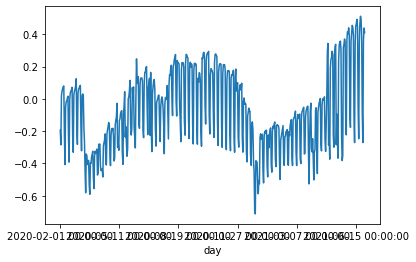

In [337]:
df_1h_rel.plot()

<AxesSubplot:xlabel='day'>

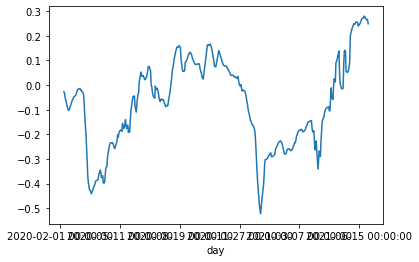

In [344]:
df_1h_rel.rolling(window=7).mean().plot()

<AxesSubplot:xlabel='day'>

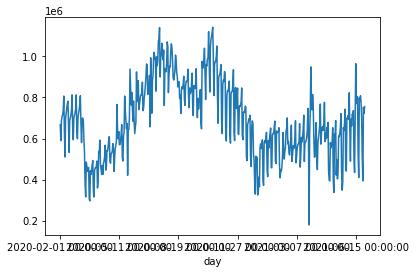

In [339]:
df_2h = df_merged[df_merged["bin"] == "2 hours"]
df_2h_sum = df_2h.groupby("day").sum()
df_2h_sum["value"].plot()

In [340]:
seven_days = df_2h_sum[1:7]
baseline = seven_days["value"].mean()
df_2h_rel = (df_2h_sum["value"]-baseline)/baseline

<AxesSubplot:xlabel='day'>

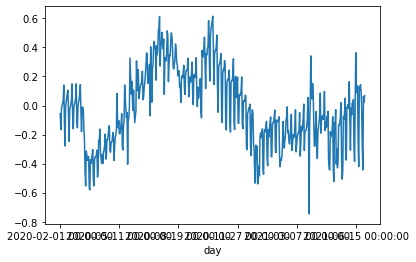

In [341]:
df_2h_rel.plot()

<AxesSubplot:xlabel='day'>

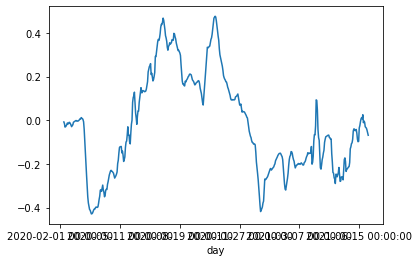

In [345]:
df_2h_rel.rolling(window=7).mean().plot()

In [388]:
df_2h_rel.rolling(window=7).mean()

day
2020-02-01 00:00:00         NaN
2020-02-02 00:00:00         NaN
2020-02-03 00:00:00         NaN
2020-02-04 00:00:00         NaN
2020-02-05 00:00:00         NaN
                         ...   
2021-06-26 00:00:00   -0.033320
2021-06-27 00:00:00   -0.036648
2021-06-28 00:00:00   -0.045750
2021-06-29 00:00:00   -0.058202
2021-06-30 00:00:00   -0.068863
Name: value, Length: 516, dtype: float64

<AxesSubplot:xlabel='day'>

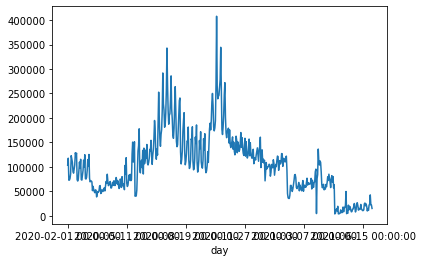

In [392]:
df_long = df_merged[df_merged["bin"] == "long"]
df_long_sum = df_long.groupby("day").sum()
df_long_sum["value"].plot()

<AxesSubplot:xlabel='day'>

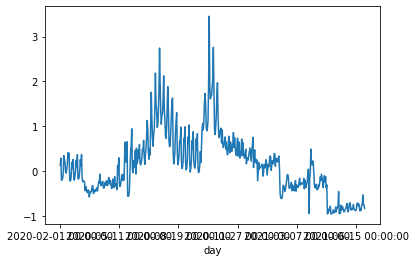

In [394]:
df_long_rel.plot()

<AxesSubplot:xlabel='day'>

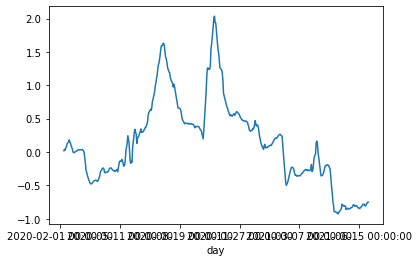

In [396]:
df_long_rel.rolling(window=7).mean().plot()

In [391]:
seven_days = df_long_sum[1:7]
baseline = seven_days["value"].mean()
df_long_rel = (df_long_sum["value"]-baseline)/baseline

In [397]:
values_2h = df_2h_rel.rolling(window=7).mean().reset_index()
values_1h = df_1h_rel.rolling(window=7).mean().reset_index()
values_15min = df_15min_rel.rolling(window=7).mean().reset_index()
values_long = df_long_rel.rolling(window=7).mean().reset_index()

In [398]:
new_df = pd.DataFrame({"day":values_2h["day"],"15 min":values_15min["value"], "1h": values_1h["value"], "2h": values_2h["value"], "long": values_long["value"] })

<AxesSubplot:>

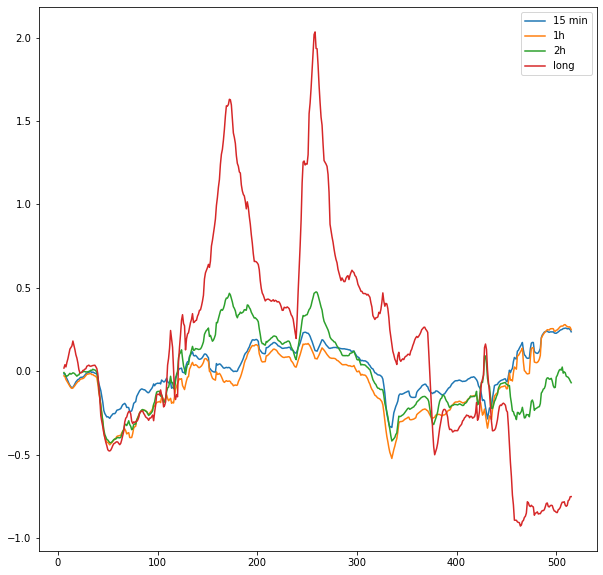

In [399]:
fig, ax = plt.subplots(figsize=(10,10))
new_df.plot(ax=ax)